**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [166]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [167]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [168]:
C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/YutongQuan_STATS201_FinalProject/main/data/Processed_Data/Classification_Test.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/YutongQuan_STATS201_FinalProject/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [169]:
C_train.isna().sum()

positive                  0
daily return_past_ma30    0
dtype: int64

## Drop nan for classification Data

In [170]:
C_train =C_train.dropna()

In [171]:
C_train.head()

,positive,daily return_past_ma30
525,0,-0.002212
526,0,-0.005586
527,0,-0.008419
528,1,-0.010532
529,0,-0.006436


In [172]:
C_test.isna().sum()

positive                  0
daily return_past_ma30    0
dtype: int64

## import train and test data for Regression

In [173]:
R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/YutongQuan_STATS201_FinalProject/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/YutongQuan_STATS201_FinalProject/main/data/Processed_Data/Regression_Train.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [174]:
R_train.isna().sum()

daily return              1
daily return_past_ma30    2
dtype: int64

In [175]:
R_train=R_train.dropna()

In [176]:
R_test.isna().sum()

daily return              1
daily return_past_ma30    2
dtype: int64

In [177]:
R_train.head()

,daily return,daily return_past_ma30
2,0.021138,-0.003241
3,-0.022293,0.008948
4,0.042345,-0.001465
5,0.006250,0.009487
6,0.000000,0.008840


In [178]:
R_test.head()

,daily return,daily return_past_ma30
0,NaN,NaN
1,-0.003241,NaN
2,0.021138,-0.003241
3,-0.022293,0.008948
4,0.042345,-0.001465


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [179]:
C_train.head()

,positive,daily return_past_ma30
525,0,-0.002212
526,0,-0.005586
527,0,-0.008419
528,1,-0.010532
529,0,-0.006436


In [180]:
C_train.dtypes

positive                    int64
daily return_past_ma30    float64
dtype: object

In [181]:
X_train = pd.DataFrame(np.array(C_train['daily return_past_ma30']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['positive'].astype(int))

In [182]:
C_test.head()

,positive,daily return_past_ma30
525,0,-0.002212
526,0,-0.005586
527,0,-0.008419
528,1,-0.010532
529,0,-0.006436


In [183]:
X_test = pd.DataFrame(np.array(C_test['daily return_past_ma30']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['positive'].astype(np.intc))

## Import base packages

In [184]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [187]:
y_pred= mdl.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

## Evaluations

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       124

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


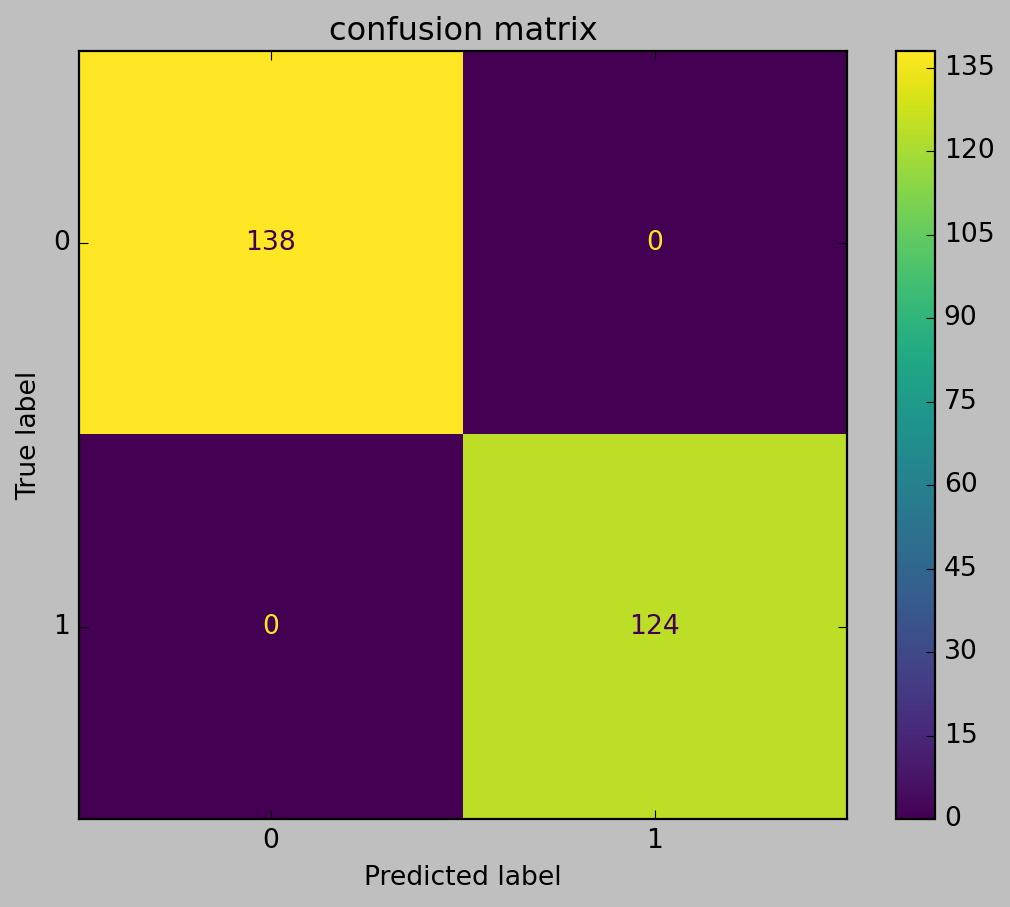

In [189]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


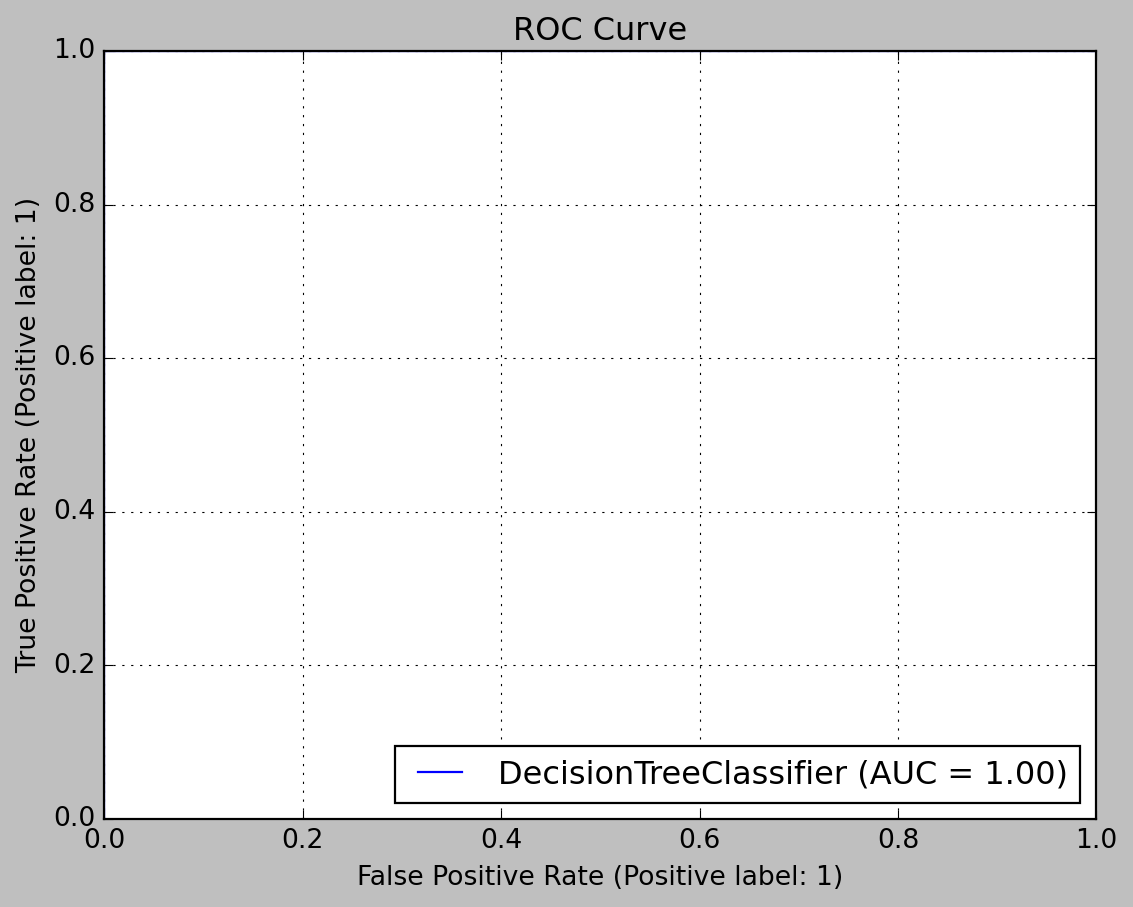

In [190]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-192-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [193]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       124

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


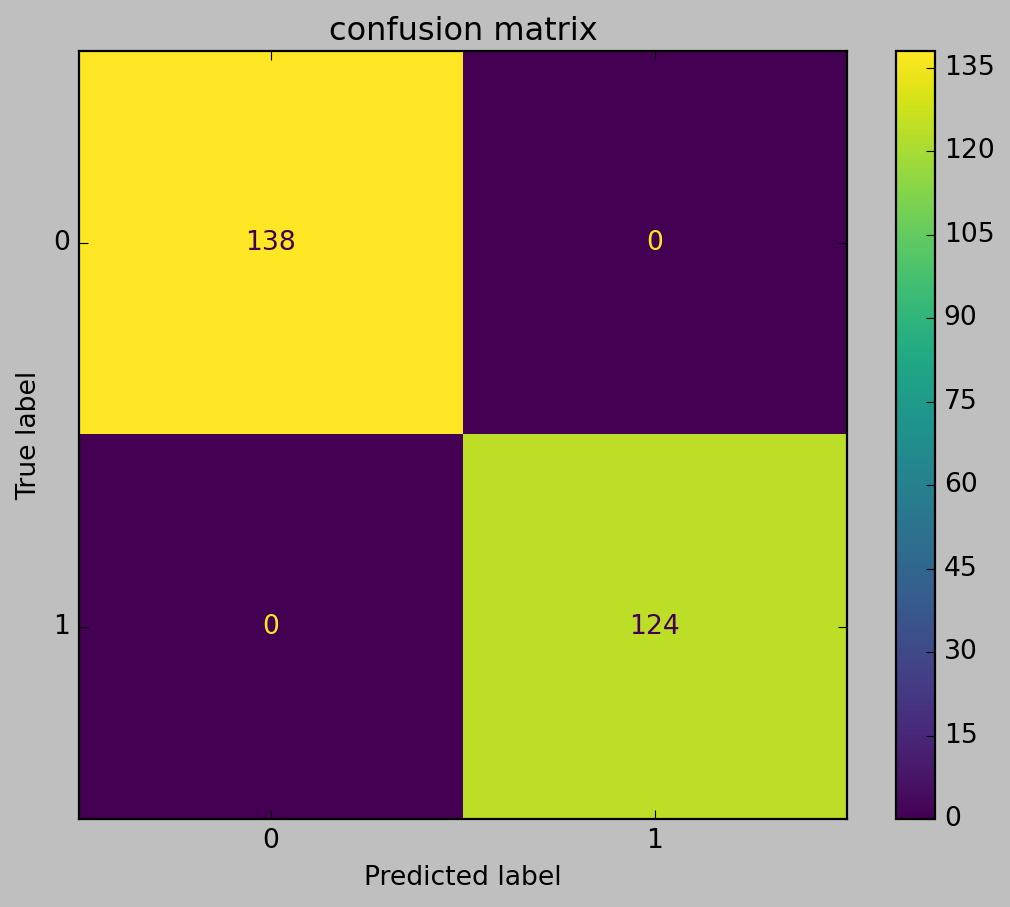

In [194]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


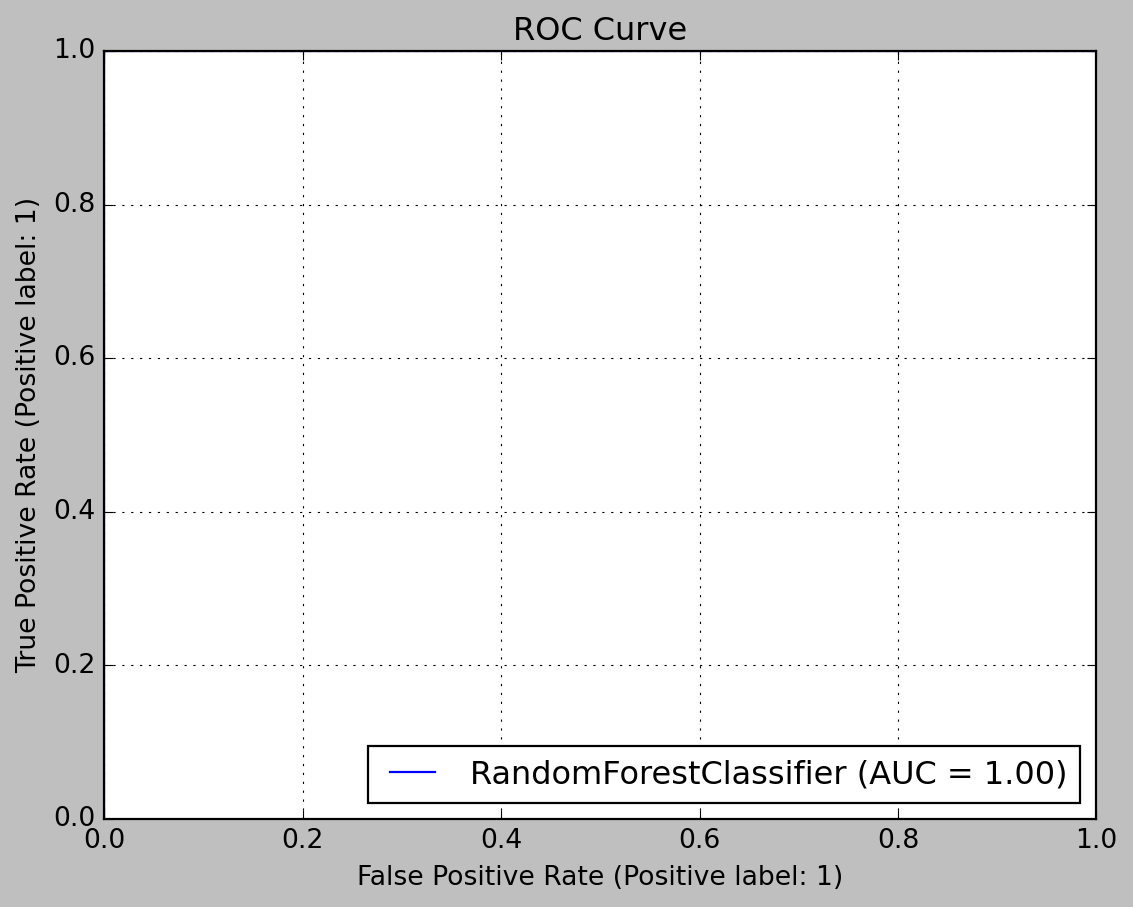

In [195]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [196]:
from sklearn.neural_network import MLPClassifier

In [197]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       138
           1       0.00      0.00      0.00       124

    accuracy                           0.53       262
   macro avg       0.26      0.50      0.35       262
weighted avg       0.28      0.53      0.36       262



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


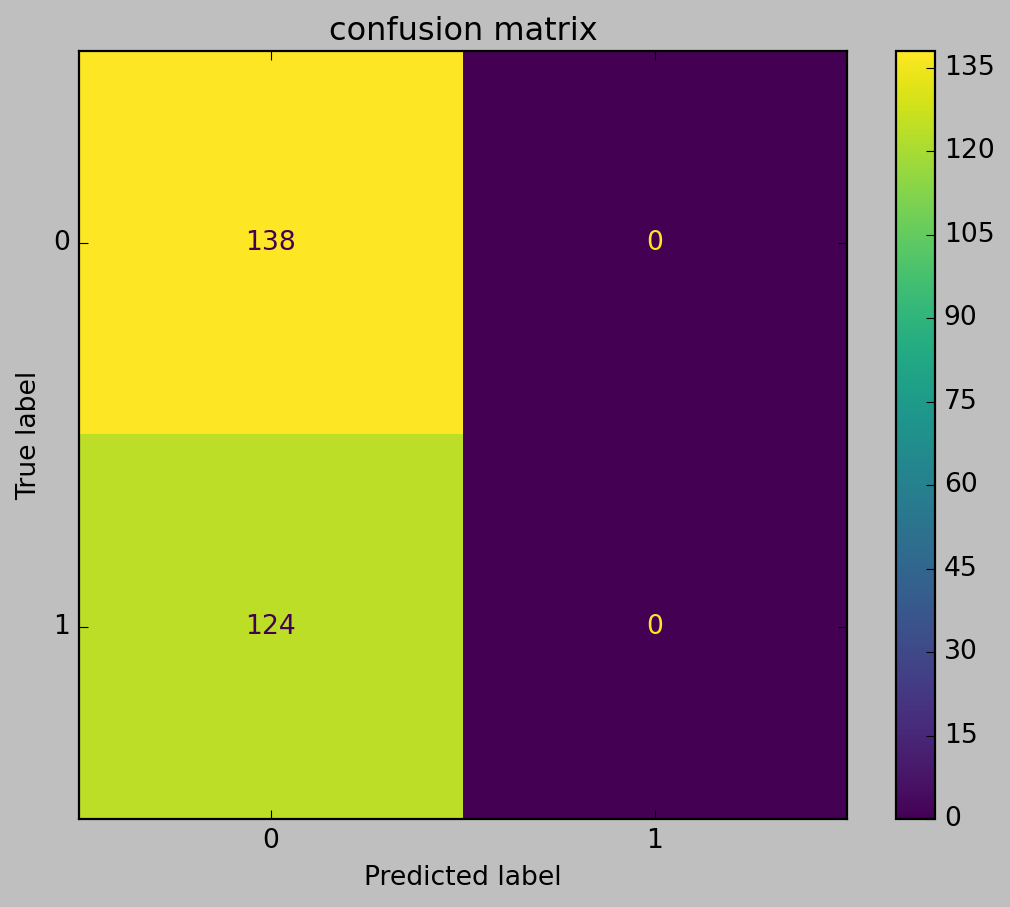

In [199]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


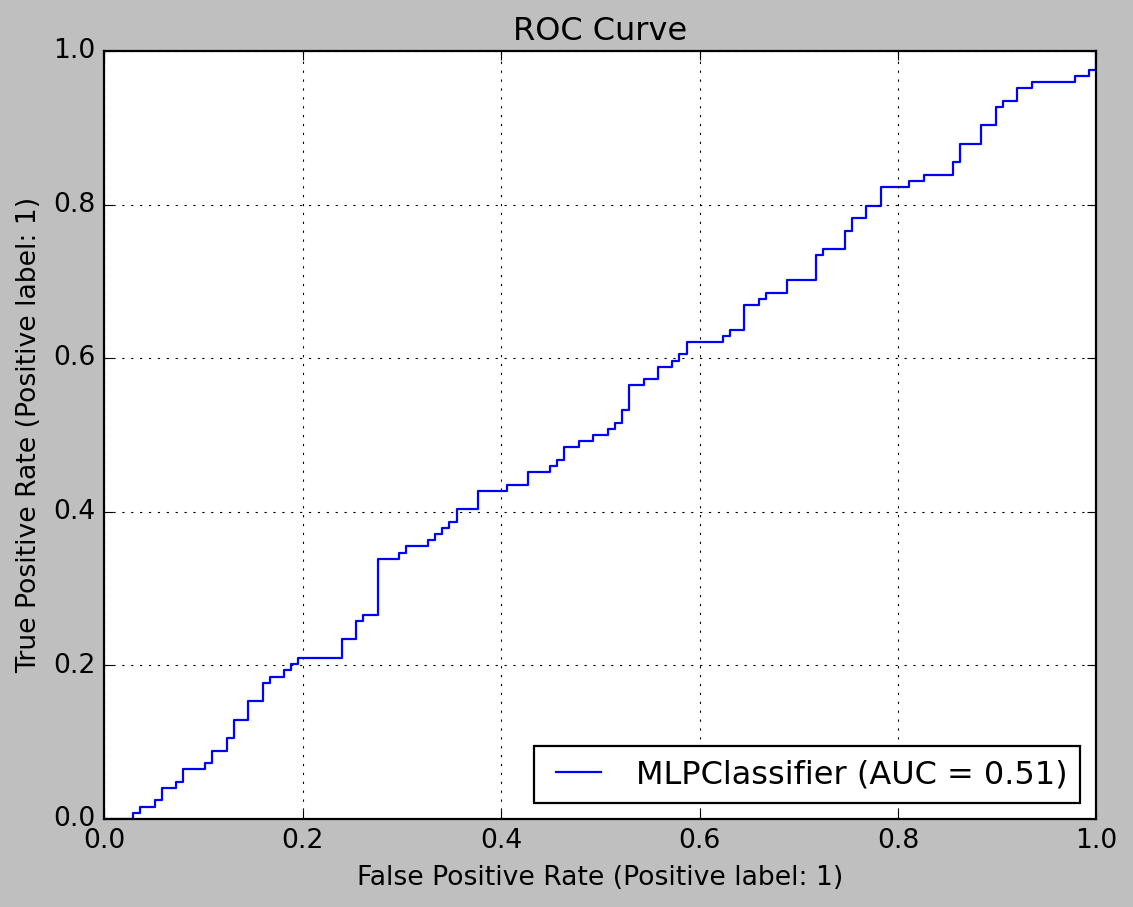

In [200]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Ridge Classifier

reference:
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

In [201]:
from sklearn.linear_model import RidgeClassifier

In [202]:
mdl = RidgeClassifier().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       138
           1       0.00      0.00      0.00       124

    accuracy                           0.53       262
   macro avg       0.26      0.50      0.35       262
weighted avg       0.28      0.53      0.36       262



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


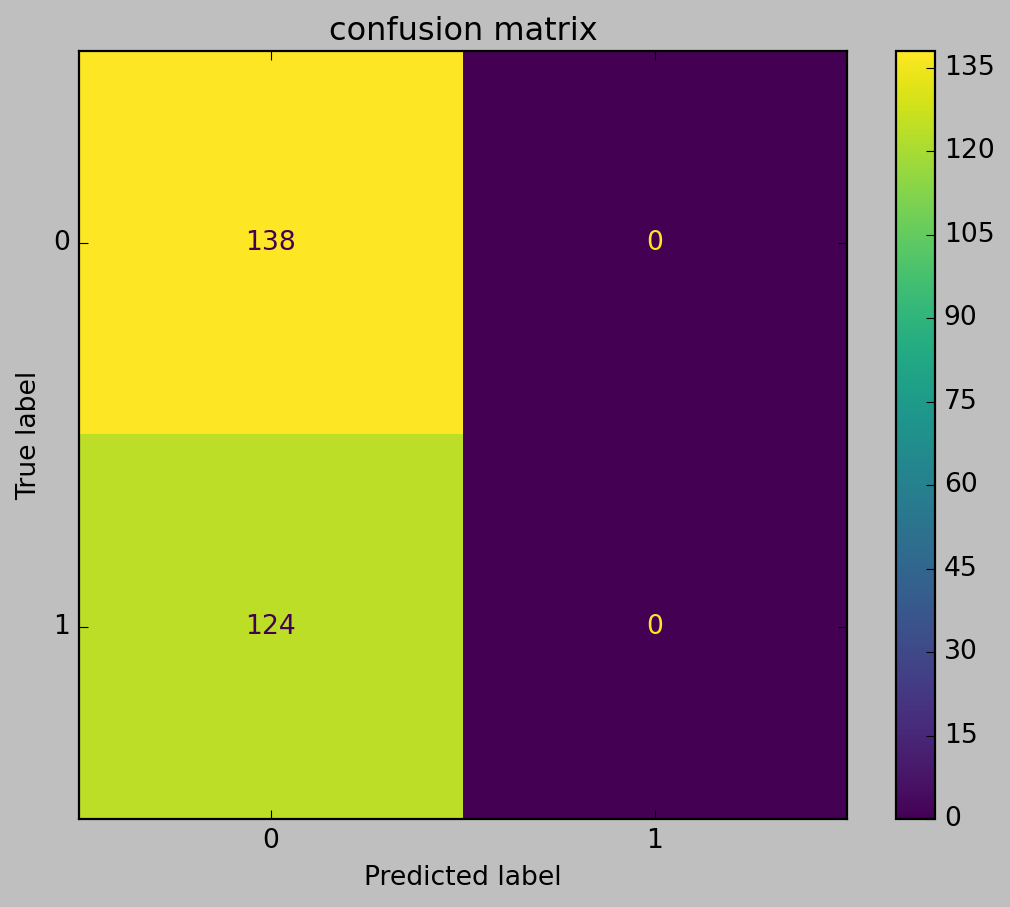

In [204]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


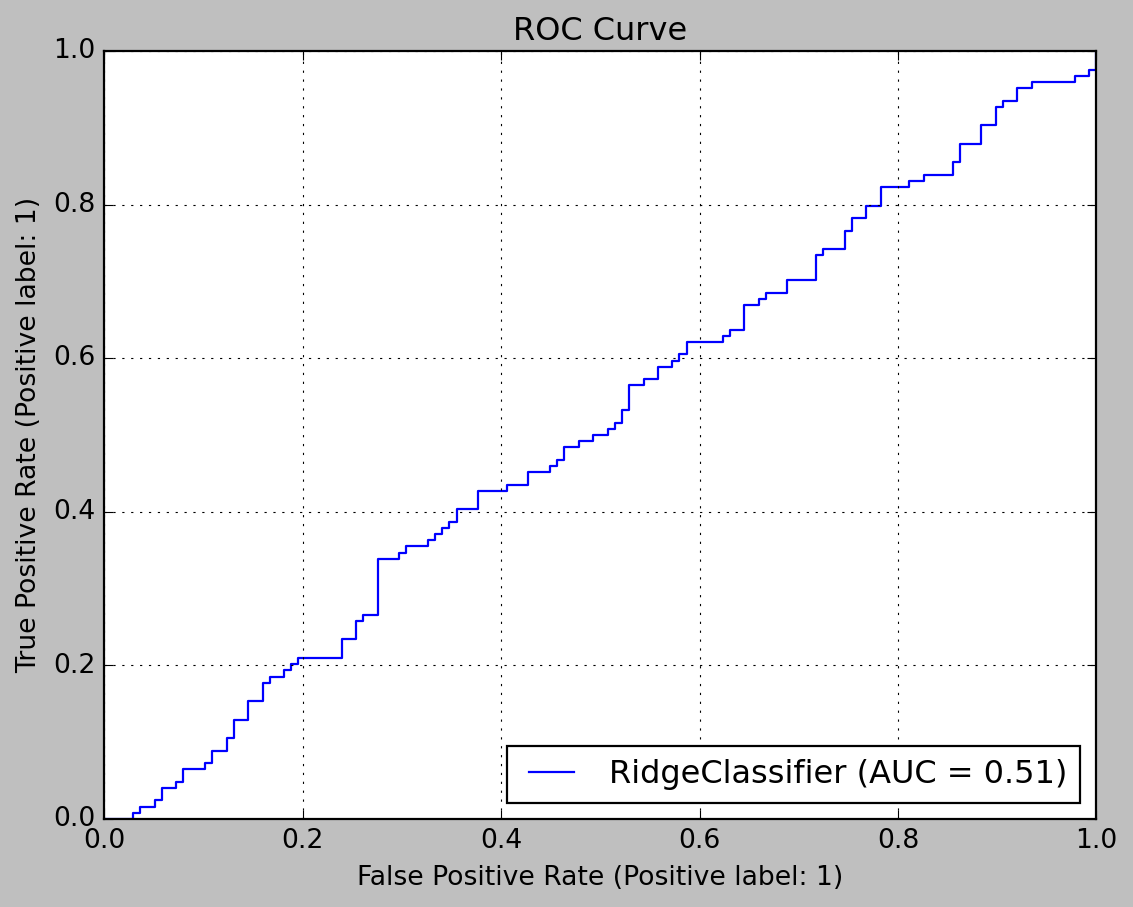

In [205]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [206]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [207]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [208]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [209]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [210]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    262
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12211.97 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type of each feature based 

In [211]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [212]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini,0.885496,0.885496,0.885246,0.870968,0.878049,0.433962,0.100508,0.073725,0.548911,0.100508,0.073725,0.548911,1,True,8
1,RandomForestEntr,0.885496,0.885496,0.891667,0.862903,0.877049,0.433962,0.104517,0.080886,0.625420,0.104517,0.080886,0.625420,1,True,6
2,ExtraTreesEntr,0.885496,0.885496,0.885246,0.870968,0.878049,0.433962,0.109807,0.073826,0.571802,0.109807,0.073826,0.571802,1,True,9
3,RandomForestGini,0.885496,0.885496,0.891667,0.862903,0.877049,0.433962,0.111458,0.120546,0.922408,0.111458,0.120546,0.922408,1,True,5
4,KNeighborsDist,0.881679,0.881679,0.878049,0.870968,0.874494,0.415094,0.003273,0.004663,0.010375,0.003273,0.004663,0.010375,1,True,2
5,KNeighborsUnif,0.645038,0.645038,0.628099,0.612903,0.620408,0.433962,0.004192,0.034074,0.012549,0.004192,0.034074,0.012549,1,True,1
6,XGBoost,0.641221,0.641221,0.656250,0.508065,0.572727,0.490566,0.008822,0.003864,0.105193,0.008822,0.003864,0.105193,1,True,11
7,LightGBMLarge,0.576336,0.576336,0.882353,0.120968,0.212766,0.566038,0.019738,0.002203,0.298728,0.019738,0.002203,0.298728,1,True,13
8,CatBoost,0.549618,0.549618,0.540541,0.322581,0.404040,0.452830,0.002128,0.004218,0.238782,0.002128,0.004218,0.238782,1,True,7
9,LightGBM,0.526718,0.526718,0.000000,0.000000,0.000000,0.528302,0.001799,0.002079,0.298279,0.001799,0.002079,0.298279,1,True,4


# Machine Learning Regression

## important global packages

In [213]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [214]:
R_test =R_test.dropna()

In [215]:
R_train.head()

,daily return,daily return_past_ma30
2,0.021138,-0.003241
3,-0.022293,0.008948
4,0.042345,-0.001465
5,0.006250,0.009487
6,0.000000,0.008840


In [216]:
X_train = pd.DataFrame(R_train['daily return_past_ma30'])
y_train = pd.DataFrame(R_train['daily return'])

In [217]:
R_test.head()

,daily return,daily return_past_ma30
2,0.021138,-0.003241
3,-0.022293,0.008948
4,0.042345,-0.001465
5,0.006250,0.009487
6,0.000000,0.008840


In [218]:
X_test = pd.DataFrame(R_test['daily return_past_ma30'])
y_test = pd.DataFrame(R_test['daily return'])

## Linear Regression

In [219]:
from sklearn import linear_model

In [220]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [221]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.005103993086970737


In [222]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.008350
1,0.003055
2,0.007578
3,0.002821
4,0.003102
...,...
518,0.008828
519,0.010362
520,0.008614
521,0.008662


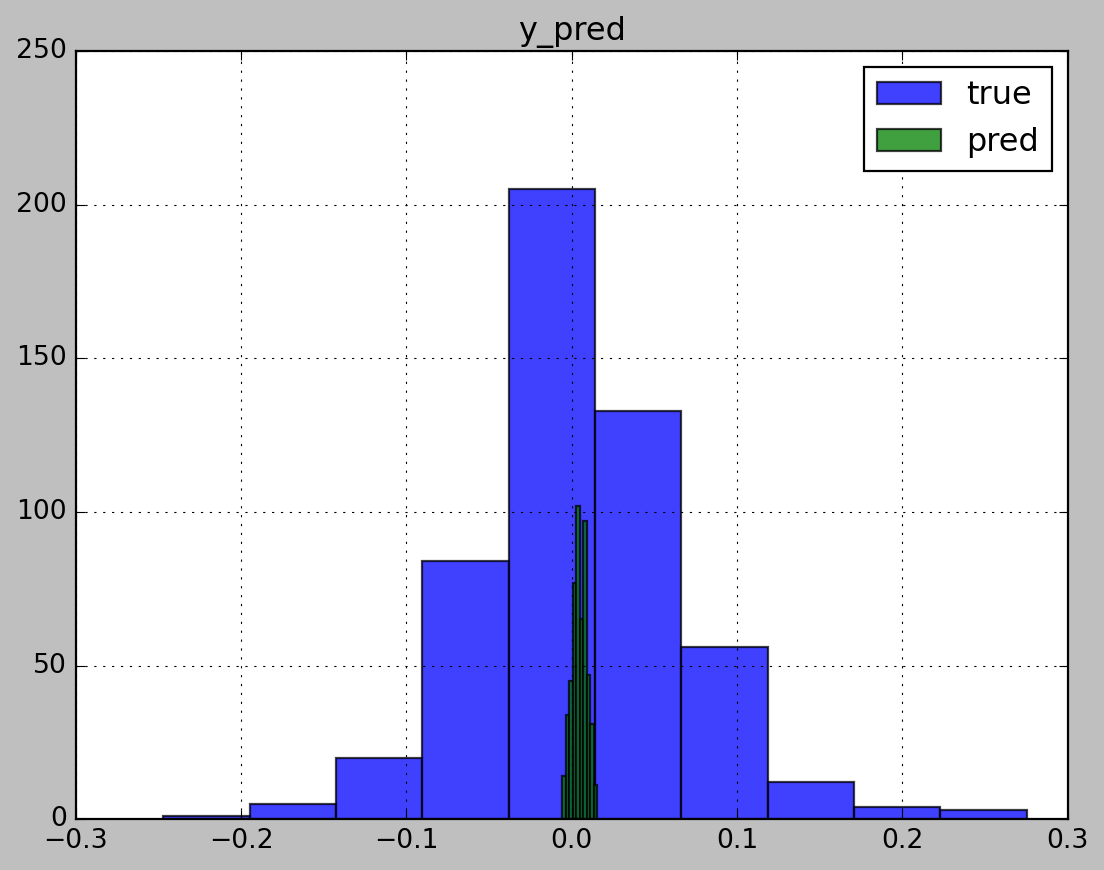

In [223]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-225-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [226]:
# calculate R2
from sklearn.metrics import r2_score

In [227]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.7891724918479176


In [228]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.013695
1,-0.007926
2,0.017711
3,-0.008074
4,0.020839
...,...
518,-0.015722
519,0.043467
520,-0.003137
521,0.003935


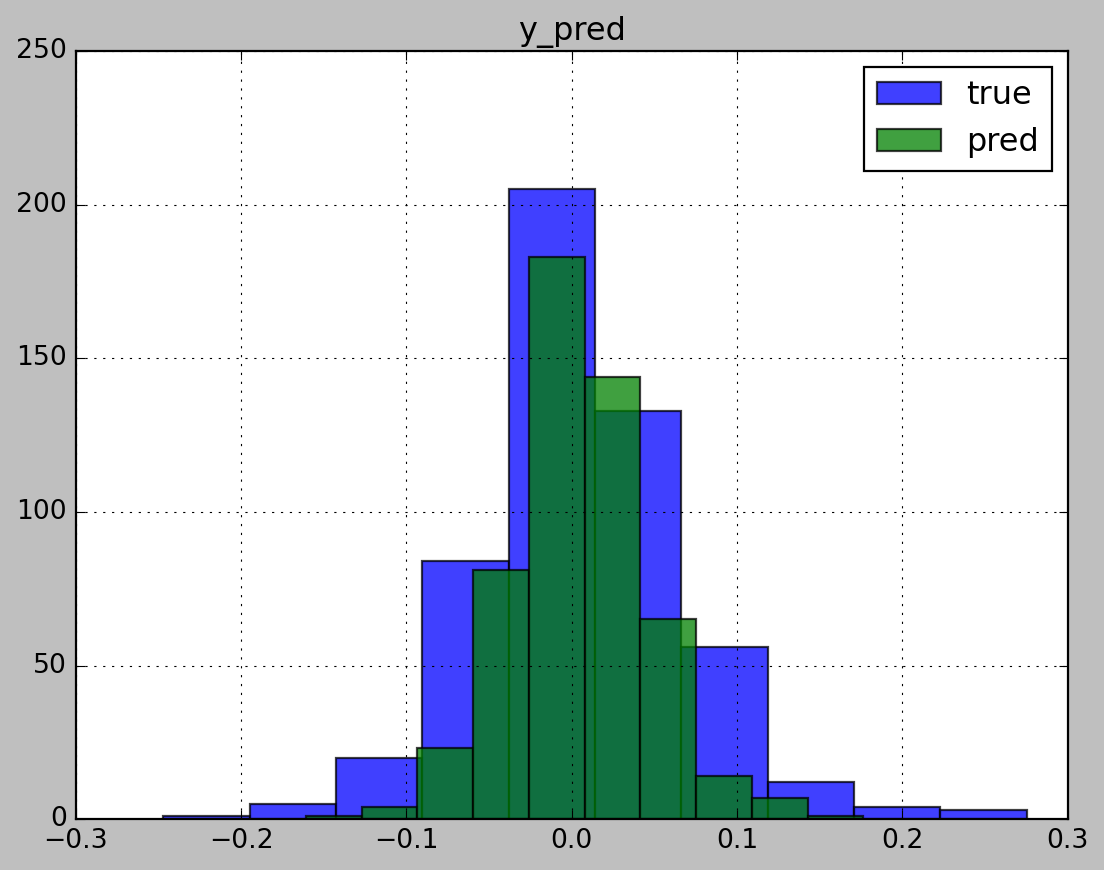

In [229]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Ridge Regression

reference:
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

In [230]:
from sklearn import linear_model

In [231]:
mdl = linear_model.Ridge(alpha=.5).fit(X_train, y_train)

In [232]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 0.0009671711185893495


In [233]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.005168
1,0.004640
2,0.005092
3,0.004617
4,0.004645
...,...
518,0.005216
519,0.005369
520,0.005195
521,0.005200


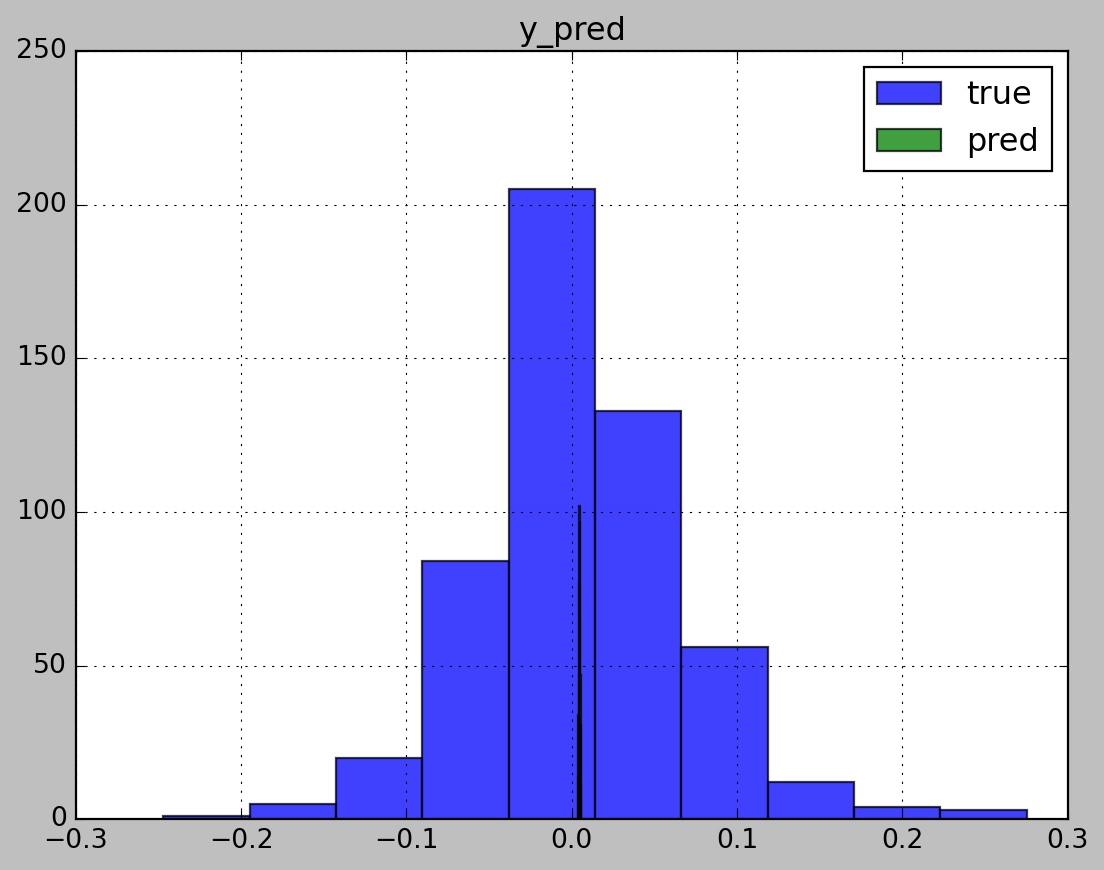

In [234]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

## Auto-ML

In [235]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [236]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [237]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    523
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2751515151515151, -0.2469690166142792, 0.00482, 0.06263)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12487.47 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)

In [238]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [239]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.037056,-0.037056,-0.001373,-0.012573,-8.437623e-10,0.649238,-0.082702,0.003918,0.005082,0.010746,0.003918,0.005082,0.010746,1,True,2
1,ExtraTreesMSE,-0.043154,-0.043154,-0.001862,-0.028134,-1.806012e-02,0.524298,-0.080679,0.080800,0.063356,0.474743,0.080800,0.063356,0.474743,1,True,7
2,RandomForestMSE,-0.045555,-0.045555,-0.002075,-0.029806,-1.858172e-02,0.469901,-0.085782,0.105191,0.081213,0.533812,0.105191,0.081213,0.533812,1,True,5
3,XGBoost,-0.057696,-0.057696,-0.003329,-0.042982,-3.512144e-02,0.149679,-0.067518,0.014807,0.004172,0.157270,0.014807,0.004172,0.157270,1,True,9
4,KNeighborsUnif,-0.059090,-0.059090,-0.003492,-0.044409,-3.529394e-02,0.108097,-0.072712,0.004573,0.016990,0.016074,0.004573,0.016990,0.016074,1,True,1
5,WeightedEnsemble_L2,-0.060672,-0.060672,-0.003681,-0.045089,-3.480717e-02,0.059700,-0.066290,0.035970,0.012533,0.860596,0.002100,0.000537,0.338902,2,True,12
6,LightGBMLarge,-0.062293,-0.062293,-0.003880,-0.045846,-3.394055e-02,0.008767,-0.067073,0.003484,0.002033,0.250629,0.003484,0.002033,0.250629,1,True,11
7,LightGBM,-0.062427,-0.062427,-0.003897,-0.045894,-3.435014e-02,0.004499,-0.067068,0.001674,0.001935,0.181172,0.001674,0.001935,0.181172,1,True,4
8,CatBoost,-0.062497,-0.062497,-0.003906,-0.045984,-3.429523e-02,0.002287,-0.067068,0.003554,0.001139,0.165560,0.003554,0.001139,0.165560,1,True,6
9,NeuralNetTorch,-0.062539,-0.062539,-0.003911,-0.045963,-3.457398e-02,0.000941,-0.067671,0.011196,0.004057,0.809725,0.011196,0.004057,0.809725,1,True,10


In [240]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: 0.059700463780206436


In [241]:
y_pred = predictor.predict(X_test)
y_pred

2      0.007365
3      0.017473
4      0.008452
5      0.010155
6      0.017469
         ...   
520    0.007179
521    0.008853
522    0.007482
523    0.007414
524    0.009234
Name: target, Length: 523, dtype: float32

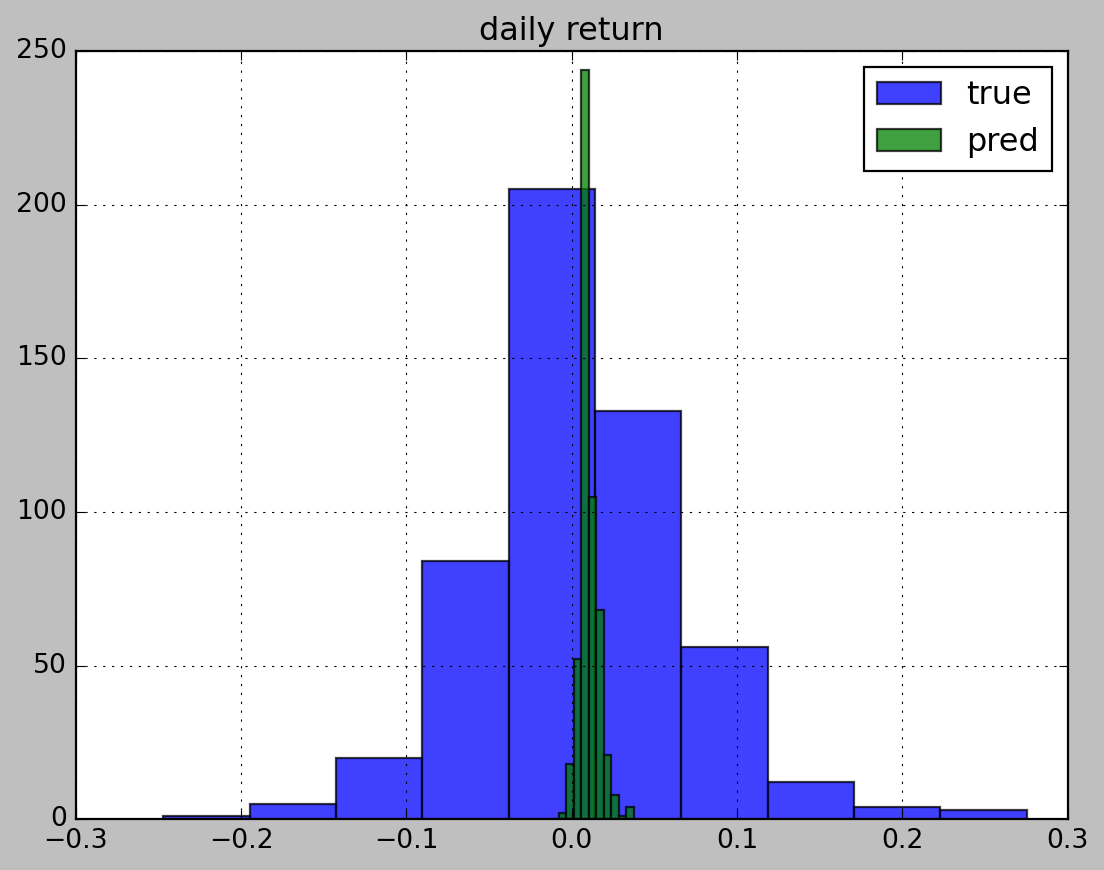

In [242]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
